In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
np.random.seed(0)

Using TensorFlow backend.


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)

In [0]:
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

In [0]:
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [0]:
X_train, y_train =train_data['features'], train_data['labels']
X_val, y_val =val_data['features'], val_data['labels']
X_test, y_test =test_data['features'], test_data['labels']

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen =ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1 ,
                            rotation_range = 10)
datagen.fit(X_train)

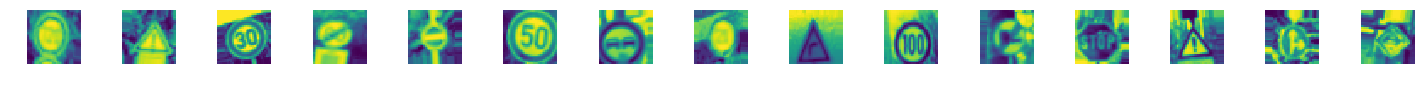

In [107]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(nrows=1, ncols= 15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "the number of images is not equal to labels"
assert(X_val.shape[0] == y_val.shape[0]), "the number of images is not equal to labels"
assert(X_test.shape[0] == y_test.shape[0]), "the number of images is not equal to labels"
assert(X_train.shape[1:] ==(32,32,3)), "Dimensions not right"
assert(X_val.shape[1:] ==(32,32,3)), "Dimensions not right"
assert(X_test.shape[1:] ==(32,32,3)), "Dimensions not right"

In [0]:
data =pd.read_csv('german-traffic-signs/signnames.csv')

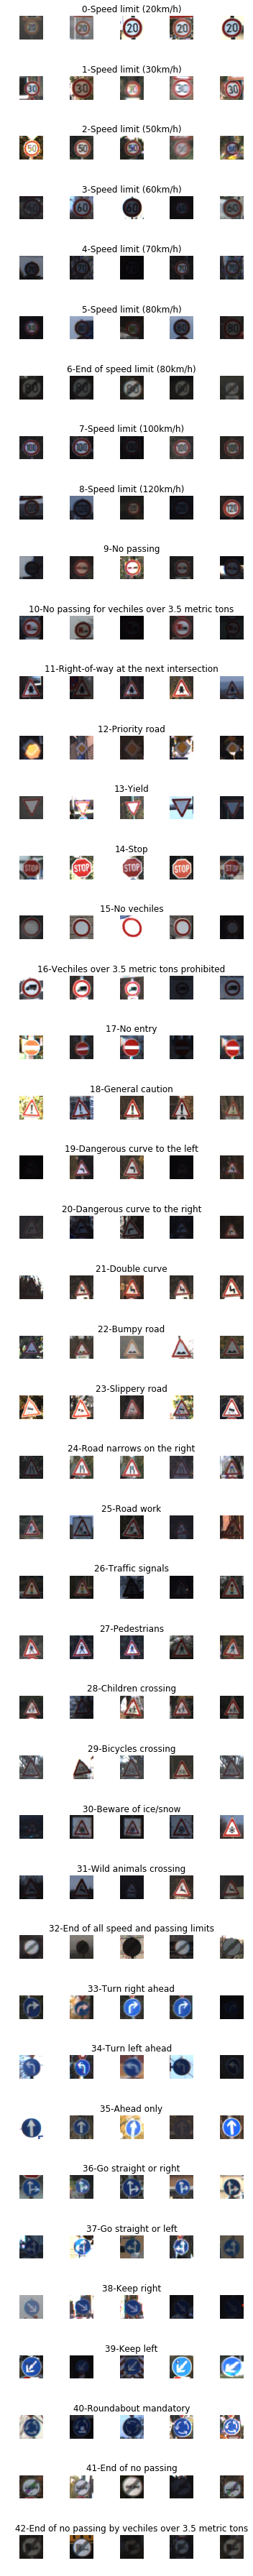

In [11]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+ row["SignName"])
            num_of_samples.append(len(x_selected))


Text(0, 0.5, 'Number of images')

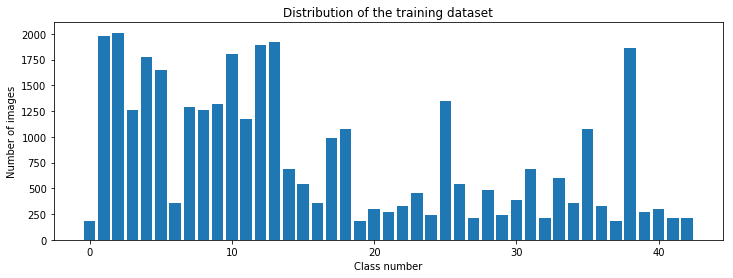

In [12]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
import cv2

36


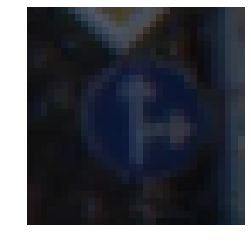

In [14]:
plt.imshow(X_train[1000])
plt.axis('off')
print(y_train[1000])

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

36
(32, 32)


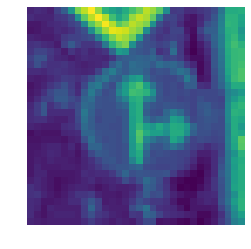

In [16]:
img =grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(y_train[1000])
print(img.shape)

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

36


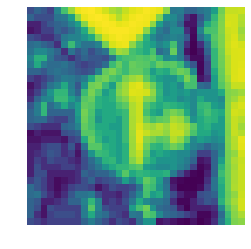

In [18]:
img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(y_train[1000])

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))


In [0]:
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(-0.5, 31.5, 31.5, -0.5)

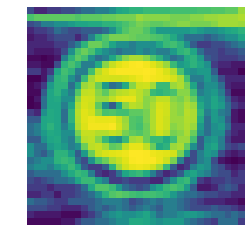

In [22]:
plt.imshow(X_train[random.randint(0,len(X_train -1 ))])
plt.axis("off")

In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_val = X_val.reshape(4410,32,32,1)
X_test = X_test.reshape(12630,32,32,1)


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [0]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(60, [5,5], input_shape=(32,32,1), activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, [3,3], activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten( ))
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr =0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, [5,5], input_shape=(32,32,1), activation ='relu'))
  model.add(Conv2D(60, [5,5], input_shape=(32,32,1), activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(30, [3,3], activation ='relu'))
  model.add(Conv2D(30, [3,3], activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(rate=0.5))
  
  model.add(Flatten( ))
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr =0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [0]:
model = modified_model()

In [112]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 480)               0         
__________

In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train,batch_size =50), steps_per_epoch=2000, epochs= 10, validation_data=(X_val, y_val), shuffle =1, verbose =1)

Epoch 1/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.9904 - acc: 0.7083 - val_loss: 0.1738 - val_acc: 0.9426
Epoch 2/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.2463 - acc: 0.9235 - val_loss: 0.0697 - val_acc: 0.9785
Epoch 3/10
2000/2000 [==============================] - 53s 27ms/step - loss: 0.1593 - acc: 0.9504 - val_loss: 0.0502 - val_acc: 0.9841
Epoch 4/10
2000/2000 [==============================] - 53s 26ms/step - loss: 0.1280 - acc: 0.9602 - val_loss: 0.0477 - val_acc: 0.9875
Epoch 5/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1015 - acc: 0.9690 - val_loss: 0.0471 - val_acc: 0.9864
Epoch 6/10
 656/2000 [========>.....................] - ETA: 34s - loss: 0.0918 - acc: 0.9721

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid(True)

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.grid(True)

In [0]:
score = model.evaluate(X_test, y_test, verbose =1)

In [0]:
print('Test score:',score[0])
print('Test accuracy:',score[1])

**TESTING**

In [0]:
#fetch image
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [0]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 


In [0]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))